In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
m_id = 'chu49/7c189dd36f048a6c'
data = pd.read_csv(m_id+'.csvs', index_col=0)

In [3]:
data.head()

,kpiid,timestamp,value,label,value_times_label,filled,inp_values,Er_AR,Er_LSTM,Diff_Slot,...,SSN_MA_5,SSN_MA_10,SSN_MA_15,SSN_HW2_1000,SSN_HW2_0204,SSN_HW2_0604,SSN_HW2_0802,SSN_AR,Er_seq2seq,Er_ARIMA
0,7c189dd36f048a6c,1491041280,2109.0,False,NaN,NaN,2109.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,7c189dd36f048a6c,1491041340,2064.0,False,NaN,NaN,2064.0,0.0,0.0,-45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,7c189dd36f048a6c,1491041400,2089.0,False,NaN,NaN,2089.0,0.0,0.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,7c189dd36f048a6c,1491041460,2149.0,False,NaN,NaN,2149.0,0.0,0.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,7c189dd36f048a6c,1491041520,1975.0,False,NaN,NaN,1975.0,0.0,0.0,-174.0,...,-104.802212,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [4]:
data.columns

Index([u'kpiid', u'timestamp', u'value', u'label', u'value_times_label',
       u'filled', u'inp_values', u'Er_AR', u'Er_LSTM', u'Diff_Slot',
       u'Diff_ma10', u'Diff_ma20', u'Diff_Ewm', u'Diff_Day', u'EWM_01',
       u'EWM_03', u'EWM_05', u'EWM_07', u'EWM_09', u'MA_5', u'MA_10', u'MA_15',
       u'HW2_1000', u'HW2_0204', u'HW2_0604', u'HW2_0802', u'Er_R2N2', u'SSN',
       u'SSN_Diff_Slot', u'SSN_Diff_ma10', u'SSN_Diff_ma20', u'SSN_Diff_Ewm',
       u'SSN_Diff_Day', u'SSN_EWM_01', u'SSN_EWM_03', u'SSN_EWM_05',
       u'SSN_EWM_07', u'SSN_EWM_09', u'SSN_MA_5', u'SSN_MA_10', u'SSN_MA_15',
       u'SSN_HW2_1000', u'SSN_HW2_0204', u'SSN_HW2_0604', u'SSN_HW2_0802',
       u'SSN_AR', u'Er_seq2seq', u'Er_ARIMA'],
      dtype='object')

In [78]:
#e1 = data['Er_AR'].values.copy()
#e1 = data['SSN_MA_5'].values.copy()
ts = data.value.values.copy()
label = data['label'].values.copy()
label2 = data['value_times_label'].values.copy()

In [46]:
%%def norm_p(e1):
    n_value = np.zeros(len(data))
    for i in range(len(e1)):
        if e1[i] and not np.isnan(e1[i]):
            break
    mean = np.mean(e1[i:])
    std = np.std(e1[i:])
    p_values = norm(loc=mean, scale=std).logpdf(e1[i:])
    n_value[:i] = np.nan
    n_value[i:] = p_values
    return n_value

In [6]:
def norm_error(e1):
    n_value = np.zeros(len(data))
    for i in range(len(e1)):
        if e1[i] and not np.isnan(e1[i]):
            break
    mean = np.mean(e1[i:])
    std = np.std(e1[i:])
    dev = (e1[i:] - mean)/std
    n_value[:i] = np.nan
    n_value[i:] = dev
    return n_value

In [83]:
def e_plot(m_min, m_max, ncol):   #ncol 0-40
    e1 = data[data.columns[ncol+7]].values.copy()
    plt.figure(figsize=(15,6))
    plt.plot(norm_error(e1)[m_min:m_max], label=data.columns[ncol+7])
    plt.plot(ts[m_min:m_max]/100)
    plt.plot(label2[m_min:m_max]/100, 'xr')
    plt.axhline(3, color= 'r', linestyle= '--')
    plt.axhline(-3, color= 'r', linestyle= '--')
    plt.axhline(5, color= 'r')
    plt.axhline(-5, color= 'r')
    plt.legend(loc=0)
    plt.show()

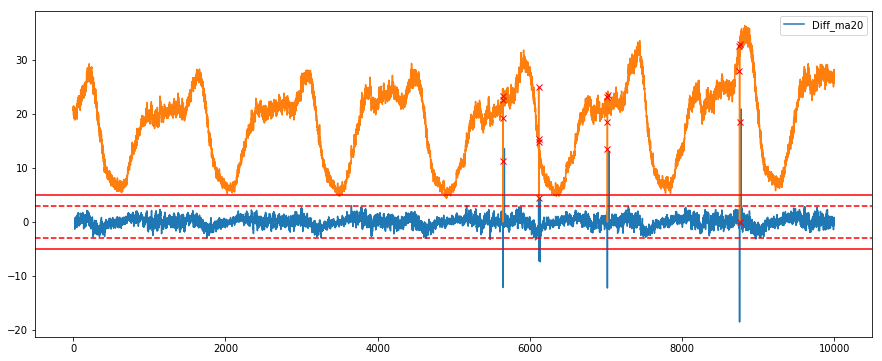

In [87]:
e_plot(0, 10000, 4)

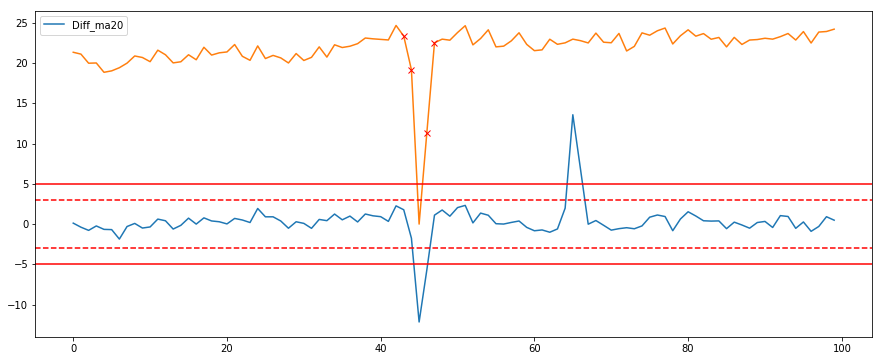

In [86]:
e_plot(5600,5700, 4)

In [44]:
data[5640:5650]

,kpiid,timestamp,value,label,value_times_label,filled,inp_values,Er_AR,Er_LSTM,Diff_Slot,...,SSN_MA_5,SSN_MA_10,SSN_MA_15,SSN_HW2_1000,SSN_HW2_0204,SSN_HW2_0604,SSN_HW2_0802,SSN_AR,Er_seq2seq,Er_ARIMA
5640,7c189dd36f048a6c,1491379680,2295.0,False,NaN,True,2295.000000,40.958030,48.485446,-7.0,...,-6.794967,27.709759,56.354435,147.669659,22.824954,-20.333101,-5.460855,38.965856,23.919708,33.254365
5641,7c189dd36f048a6c,1491379740,2288.0,False,NaN,NaN,2288.000000,17.869837,32.078095,-7.0,...,-39.798852,-11.647038,20.459362,80.908388,-52.142607,-69.040153,-51.142861,-1.373611,10.039163,13.805731
5642,7c189dd36f048a6c,1491379800,2468.0,False,NaN,NaN,2468.000000,186.093242,206.563607,180.0,...,102.595905,149.171315,178.225155,235.937966,89.891483,105.328140,120.264110,172.515392,188.053155,188.030456
5643,7c189dd36f048a6c,1491379860,2336.0,True,2336.0,NaN,2439.666667,14.567472,1.237832,-132.0,...,-5.196995,16.835888,49.208790,114.535184,-58.370855,-42.846841,-24.377311,20.892350,-26.462606,-36.867363
5644,7c189dd36f048a6c,1491379920,1917.0,True,1917.0,NaN,2411.333333,-385.544180,-405.083086,-419.0,...,-330.186785,-352.454010,-334.587538,-268.083348,-487.773844,-468.999385,-445.637609,-368.289609,-426.411705,-433.157651
5645,7c189dd36f048a6c,1491379980,0.0,True,NaN,NaN,2383.000000,-2172.512782,-2169.742123,-1917.0,...,-1788.533598,-2046.280646,-2109.193178,-2157.682737,-2426.220785,-2388.863242,-2367.400734,-2170.125535,-2143.518801,-2144.608412
5646,7c189dd36f048a6c,1491380040,1128.0,True,1128.0,NaN,2354.666667,-274.863883,-377.756814,1128.0,...,-440.441146,-812.742920,-918.075635,-1004.209975,-1311.012941,-1206.032670,-1207.186598,-329.315343,30.476205,-15.678436
5647,7c189dd36f048a6c,1491380100,2253.0,True,2253.0,NaN,2326.333333,769.462929,980.251024,1125.0,...,743.320166,338.326436,234.378798,259.548055,-98.639789,138.549179,123.618416,735.774743,1092.555021,978.052669
5648,7c189dd36f048a6c,1491380160,2298.0,False,NaN,NaN,2298.000000,418.306636,370.477460,45.0,...,775.996591,372.436067,252.604481,278.659780,308.191305,451.297215,285.269533,390.664260,477.880514,531.618104
5649,7c189dd36f048a6c,1491380220,2285.0,False,NaN,NaN,2285.000000,239.763571,102.922007,-13.0,...,685.395326,357.634437,233.535990,230.322336,689.056500,419.579724,243.960499,222.529489,227.808725,320.336829


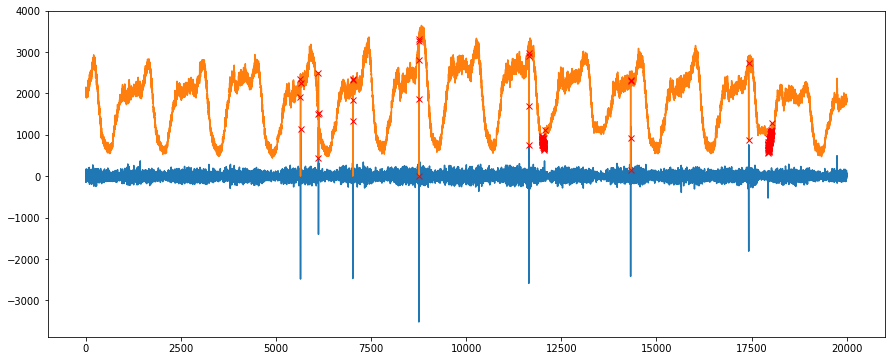

In [50]:
e_plot(0,20000)

In [44]:
def all_plot(m_min, m_max):
    plt.figure(figsize=(15,6))
    for name in data.columns[7:]:
        plt.plot(data[name].values.copy()[m_min:m_max])
    #plt.plot(e2[m_min:m_max])
    plt.plot(label[m_min:m_max], 'rx')
    plt.show()

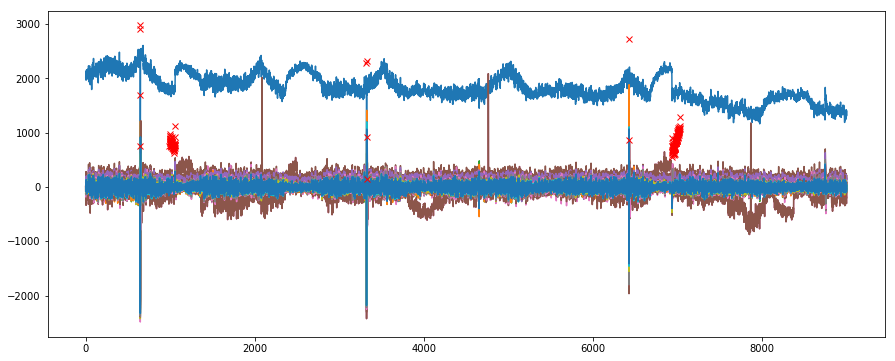

In [46]:
all_plot(11000,20000)